# Feature Selection for Classification

In this demo we will use the Heart Disease dataset, as it contains a class label (yes/no), numerical and nominal features

# Load the dataset

In [52]:
import pandas as pd
import numpy as np

#load heart disease data from csv
df = pd.read_csv('heart_disease_uci_modified.csv')

Label: 0 = no heart disease / 1 = heart disease

Features:
- id (Unique id for each patient)
- age (Age of the patient in years)
- origin (place of study)
- sex (Male/Female)
- cp chest pain type ([typical angina, atypical angina, non-anginal, asymptomatic])
- trestbps resting blood pressure (resting blood pressure (in mm Hg on admission to the hospital))
- chol (serum cholesterol in mg/dl)
- fbs (if fasting blood sugar > 120 mg/dl)
- restecg (resting electrocardiographic results)
- thalach: maximum heart rate achieved
- exang: exercise-induced angina (True/ False)
- oldpeak: ST depression induced by exercise relative to rest
- slope: the slope of the peak exercise ST segment
- ca: number of major vessels (0-3) colored by fluoroscopy
- thal: [normal; fixed defect; reversible defect]


# Explore dataset

<Axes: title={'center': 'Count (target)'}, xlabel='label'>

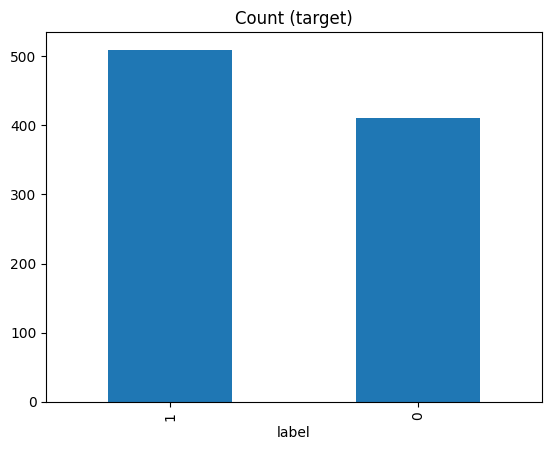

In [53]:
df['label'].value_counts().plot(kind='bar', title='Count (target)')

In [54]:
df.describe(include='object').columns

Index(['sex', 'dataset', 'cp', 'mdnr', 'fbs', 'restecg', 'exang', 'slope',
       'thal'],
      dtype='object')

In [55]:
df.describe(include='number')

,id,age,height,trestbps,chol,thalch,oldpeak,ca,label
count,920.000000,920.000000,920.000000,861.000000,890.000000,865.000000,858.000000,309.000000,920.000000
mean,460.500000,53.510870,170.048477,132.132404,199.130337,137.545665,0.878788,0.676375,0.553261
std,265.725422,9.424685,10.142339,19.066070,110.780810,25.926276,1.091226,0.935653,0.497426
min,1.000000,28.000000,136.693078,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000
25%,230.750000,47.000000,163.514650,120.000000,175.000000,120.000000,0.000000,0.000000,0.000000
50%,460.500000,54.000000,170.237452,130.000000,223.000000,140.000000,0.500000,0.000000,1.000000
75%,690.250000,60.000000,176.753359,140.000000,268.000000,157.000000,1.500000,1.000000,1.000000
max,920.000000,77.000000,202.845421,200.000000,603.000000,202.000000,6.200000,3.000000,1.000000


array([[<Axes: title={'center': 'id'}>, <Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'height'}>],
       [<Axes: title={'center': 'trestbps'}>,
        <Axes: title={'center': 'chol'}>,
        <Axes: title={'center': 'thalch'}>],
       [<Axes: title={'center': 'oldpeak'}>,
        <Axes: title={'center': 'ca'}>,
        <Axes: title={'center': 'label'}>]], dtype=object)

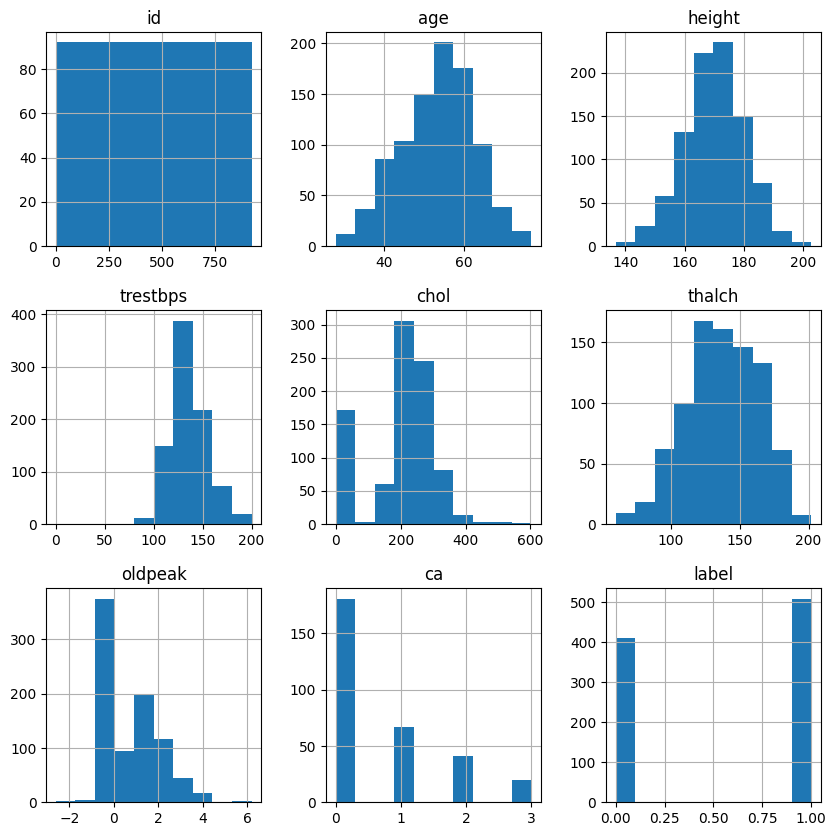

In [56]:
df.hist(figsize=(10,10))

In [57]:
#show unique values for numerical features with less than 10 unique values
for col in df.columns:
    if df[col].nunique() < 10:
        print(f'{col}: {df[col].unique()}')

sex: ['Male' 'Female']
dataset: ['Cleveland' 'Hungary' 'Switzerland' 'VA Long Beach']
cp: ['typical angina' 'asymptomatic' 'non-anginal' 'atypical angina']
mdnr: ['GA' 'GP' 'GT']
fbs: [True False nan]
restecg: ['lv hypertrophy' 'normal' 'st-t abnormality' nan]
exang: [False True nan]
slope: ['downsloping' 'flat' 'upsloping' nan]
ca: [ 0.  3.  2.  1. nan]
thal: ['fixed defect' 'normal' 'reversable defect' nan]
label: [0 1]


In [58]:
#create label "survived"
label= df['label']

#separate/remove survived from features
features = df.drop(columns=['label'])

# Feature selection by variance and variation ratio

#### Continuous and discrete features which can be used for variance calculation

In [59]:
variance_features = features.describe(include='number').columns
variance_features = [col for col in variance_features if features[col].nunique() > 3]
variance_features

['id', 'age', 'height', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca']

In [60]:
#min-max normalize continuous features to be able to compare their variance
normalized_features = []
for col in variance_features:
    normalized_col = col+'_normalized'
    normalized_features.append(normalized_col)
    features[normalized_col] = (features[col] - features[col].min()) / (features[col].max() - features[col].min())

#describe normalized data
features[normalized_features].describe()

,id_normalized,age_normalized,height_normalized,trestbps_normalized,chol_normalized,thalch_normalized,oldpeak_normalized,ca_normalized
count,920.000000,920.000000,920.000000,861.000000,890.000000,865.000000,858.000000,309.000000
mean,0.500000,0.520630,0.504221,0.660662,0.330233,0.546096,0.395317,0.225458
std,0.289146,0.192341,0.153318,0.095330,0.183716,0.182579,0.124003,0.311884
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.250000,0.387755,0.405452,0.600000,0.290216,0.422535,0.295455,0.000000
50%,0.500000,0.530612,0.507078,0.650000,0.369818,0.563380,0.352273,0.000000
75%,0.750000,0.653061,0.605576,0.700000,0.444444,0.683099,0.465909,0.333333
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [61]:
features[normalized_features].var()

id_normalized          0.083606
age_normalized         0.036995
height_normalized      0.023506
trestbps_normalized    0.009088
chol_normalized        0.033752
thalch_normalized      0.033335
oldpeak_normalized     0.015377
ca_normalized          0.097272
dtype: float64

Variance values are higher for features: 
- id_normalized
- age
- height
- trestbps

#### Categorical and discrete features which should be checked with variation ratio


In [62]:
variation_features = features.describe(include='object').columns
#variation_features = [col for col in variation_features if features[col].nunique() > 3]
variation_features


Index(['sex', 'dataset', 'cp', 'mdnr', 'fbs', 'restecg', 'exang', 'slope',
       'thal'],
      dtype='object')

In [63]:
non_continous_feature_data=features[variation_features]
non_continous_feature_data_var = non_continous_feature_data.apply(lambda x: x.value_counts(normalize=True).max(), axis=0)
non_continous_feature_data_var_ratio=1-non_continous_feature_data_var
non_continous_feature_data_var_ratio.sort_values(ascending=False)

dataset    0.669565
mdnr       0.659783
thal       0.548387
cp         0.460870
slope      0.435352
restecg    0.399782
exang      0.389595
sex        0.210870
fbs        0.166265
dtype: float64

Strong variation ratio on: 
- dataset
- mdnr
- thal
- cp

# Feature selection for continuous data using correlation

In [64]:
continous_df=pd.concat([features[variance_features],label],axis=1)
continous_df

,id,age,height,trestbps,chol,thalch,oldpeak,ca,label
0,1,63,189.450621,145.0,233.0,150.0,2.3,0.0,0
1,2,67,184.106870,160.0,286.0,108.0,1.5,3.0,1
2,3,67,156.542477,120.0,229.0,129.0,2.6,2.0,1
3,4,37,192.573652,130.0,250.0,187.0,3.5,0.0,0
4,5,41,166.332530,130.0,204.0,172.0,1.4,0.0,0
...,...,...,...,...,...,...,...,...,...
915,916,54,150.632041,127.0,333.0,154.0,0.0,NaN,1
916,917,62,168.158879,NaN,139.0,NaN,NaN,NaN,0
917,918,55,170.177669,122.0,223.0,100.0,0.0,NaN,1
918,919,58,155.745643,NaN,385.0,NaN,NaN,NaN,0


In [65]:
correlation = continous_df.corr()

<Axes: >

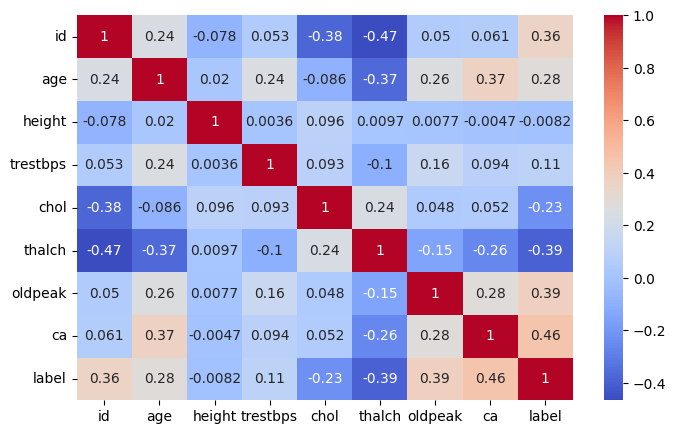

In [66]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8,5))
sns.heatmap(correlation, annot=True, cmap='coolwarm')

Negative Correlation to Label:

    - thalach: maximum heart rate achieved
    - chol (serum cholesterol in mg/dl)

Positive Correlation to Label:

    - oldpeak: ST depression induced by exercise relative to rest
    - age
    - id
    - ca: number of major vessels (0-3) colored by fluoroscopy


# Feature selection for numeric features and nominal label using anova-f statistic

In [68]:
continuous_features=features[variance_features]

continuous_features.isnull().sum()

id            0
age           0
height        0
trestbps     59
chol         30
thalch       55
oldpeak      62
ca          611
dtype: int64

<Axes: >

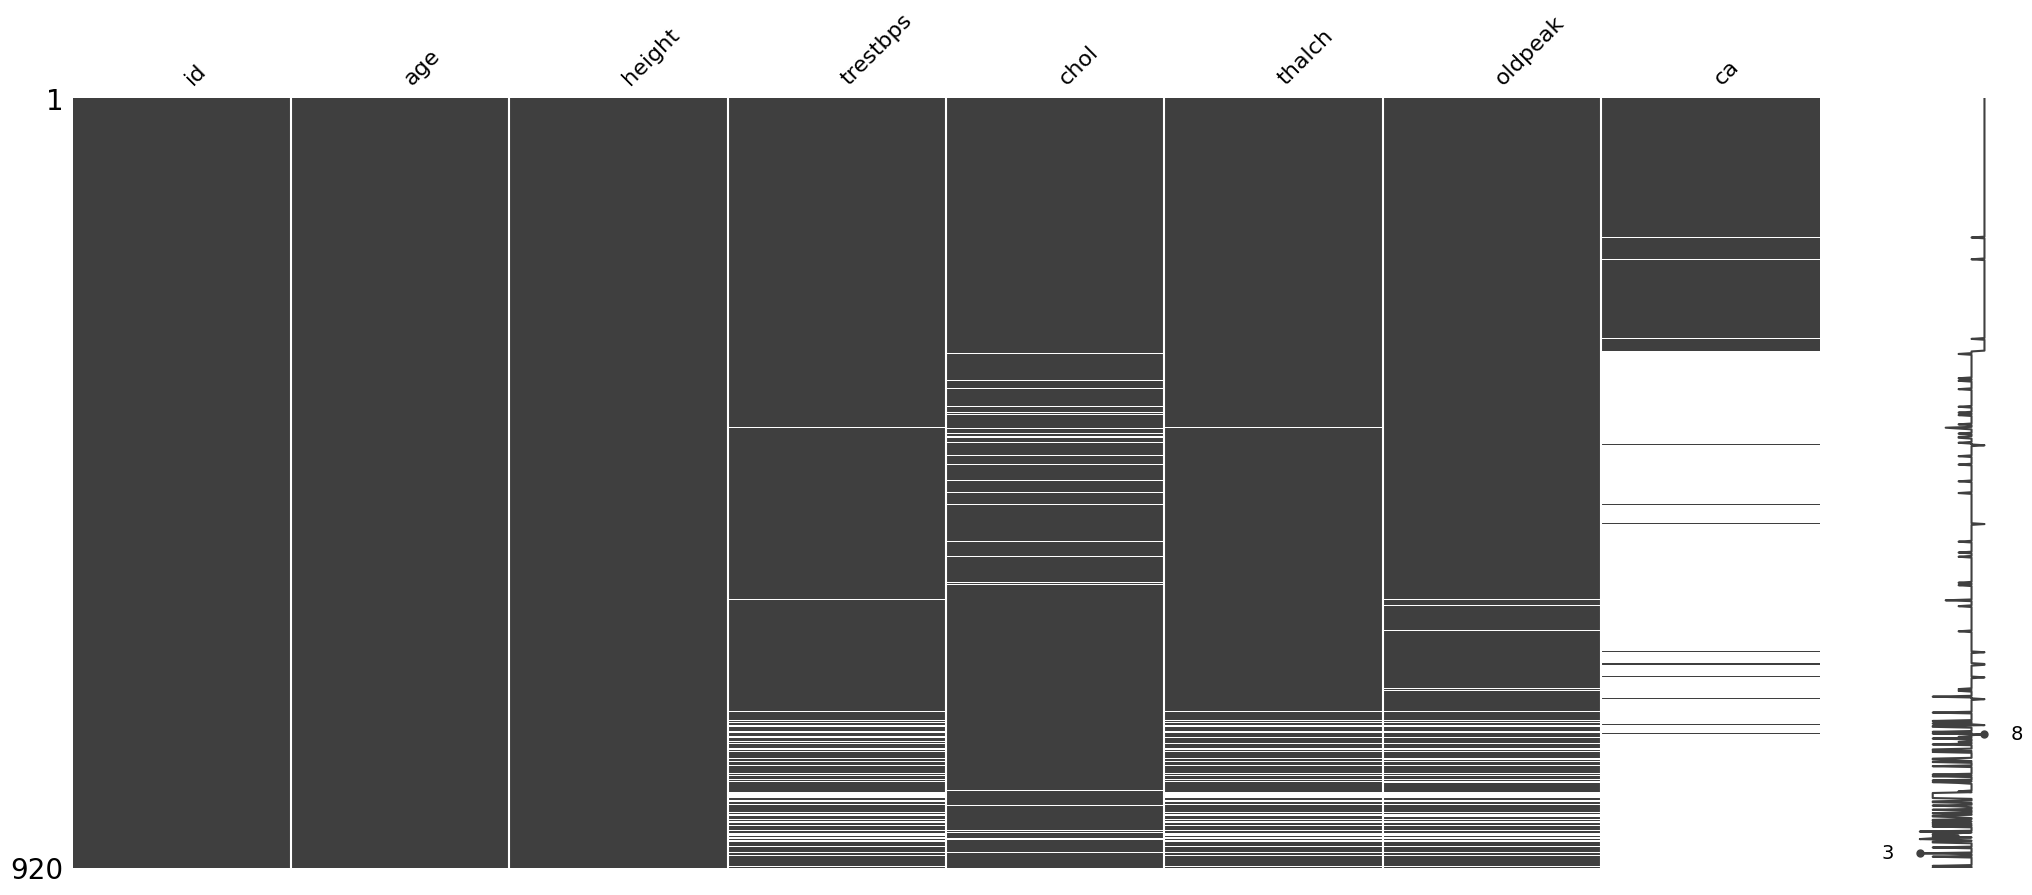

In [69]:
import missingno as msno
msno.matrix(continuous_features)

In [70]:
# replace missing values in each column with the mean of the column

continuous_features.fillna(continuous_features.mean(), inplace=True)

#Listwise deletion (all rows with multiple missing values)
#continuous_features=continuous_features.drop(continuous_features[continuous_features.isnull().sum(axis=1)>2].index)
#continuous_features

/var/folders/c4/7xlj3rws5j14gj8d_xbctn4r0000gn/T/ipykernel_36938/4243640914.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  continuous_features.fillna(continuous_features.mean(), inplace=True)


<Axes: >

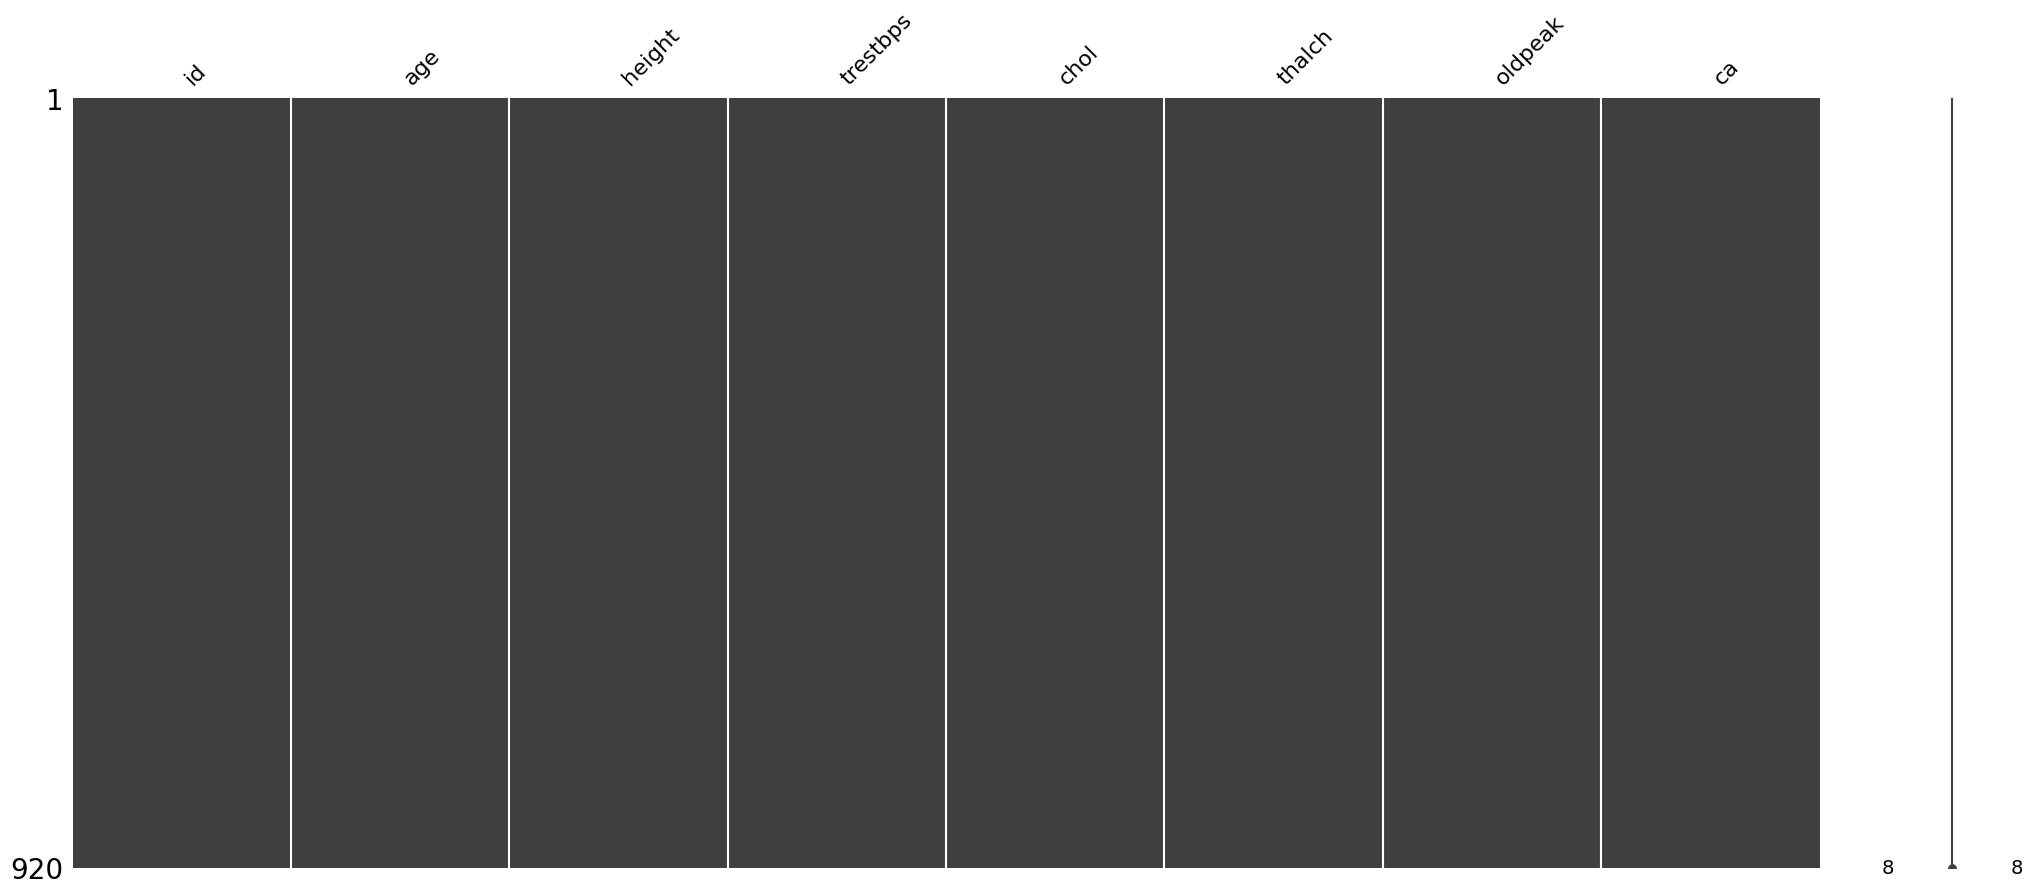

In [71]:
msno.matrix(continuous_features)

In [50]:
# # Impute with mean 
# for col in ['trestbps','chol','oldpeak']:
#     continuous_features[col] = (continuous_features[col]
#                                         .fillna(continuous_features[col].mean()))

In [ ]:
# from sklearn import linear_model
# import numpy as np
# np.random.seed(123)
# reg = linear_model.LinearRegression()
# #store ids of rows without missing values in feature "s3"
# ids = df[df['s3'].notnull()].index.values
# #train regression model
# reg.fit(df.loc[ids, ['s4']], df.loc[ids, 's3'])
# #show rows with missing values in feature "sepal length (cm)"
# df[df['s3'].isnull()]

# Feature selection for non-continous data using chi2 test (label=class)

# Conclusion